<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

# Urinary Analyses of Elements found in Typically Developing(TD) and Austism Spectrum Disordered (ASD) Children & their Mothers 

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

### Table of Contents <a class="anchor" id="PAN_top"></a>

* [Table of Contents](#PAN_top)
    * [Page 1 - Abstract](#PAN_page1)
    * [Page 2 - Imported Libraries](#PAN_page2)
    * [Page 3 - Import and Clean the Dataset](#PAN_page3)
    * [Page 4 - Set Options and View the Data](#PAN_page4)
    * [Page 5 - Get Info and Descriptive Statistics on the Data](#PAN_page5)
    * [Page 6 - Q1: "Is there a predictive relationship between levels of toxic and essential elements and the occurrence of ASD/TD in children?"](#PAN_page6)
    * [Page 7 - Q1: Analysis: Logistic Regressions](#PAN_page7)
    * [Page 8 - Q1: Analysis: Logistic Regressions: Correlation Matrix](#PAN_page8)
    * [Page 9 - Q1: Analysis: Logistic Regressions: Variance Inflation Factor](#PAN_page9)  
    * [Page 10 - Q1: Analysis: Logistic Regressions: Principal Component Analysis](#PAN_page10)  
    * [Page 11 - Q1: Analysis: Logistic Regressions: Principal Component Analysis Continued](#PAN_page11)  
    * [Page 12 - Q1: Conclusions](#PAN_page12)  
    * [Page 13 - Q2: "How does the urine test differ (Toxic vs Essential) for children with ASD to TD children?"](#PAN_page13)  
    * [Page 14 - Q2: Conclusions](#PAN_page14)  
    * [Page 15 - Q3: "Is there a predictive relationship between levels of toxic and essential elements and the occurrence of ASD/TD in mothers?"](#PAN_page15)  
    * [Page 16 - Q3: Analysis: Logistic Regressions](#PAN_page16)  
    * [Page 17 - Q3: Analysis: Logistic Regressions: Correlation Matrix](#PAN_page17)  
    * [Page 18 - Q3: Analysis: Logistic Regressions: Variance Inflation Factor](#PAN_page18)  
    * [Page 19 - Q3: Analysis: Logistic Regressions: Principal Component Analysis](#PAN_page19)  
    * [Page 20 - Q3: Analysis: Logistic Regressions: Principal Component Analysis Continued](#PAN_page20)  
    * [Page 21 - Q3: Conclusions](#PAN_page21)  
    * [Page 22 - Q4: "How does the urine test differ (Toxic vs Essential) for mothers with ASD to TD mothers?"](#PAN_page22)  
    * [Page 23 - Q4: Conclusions](#PAN_page23)  
    * [Page 24 - Q5: "How does the urine test differ (Toxic vs Essential) for kids with ASD to their ASD mothers?"](#PAN_page24)  
    * [Page 25 - Q5: Conclusions](#PAN_page25)  
    * [Page 26 - Q6: "How does the urine test differ (Toxic vs Essential) TD children to their TD mothers?"](#PAN_page26)  
    * [Page 27 - Q6: Conclusions](#PAN_page27)  

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

# Page 1 - Abstract <a class="anchor" id="PAN_page1"></a>

[Back to Top](#PAN_top)

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

### Background
Even though the cause of autism spectrum disorders (ASD) remains unknown, the current understanding points towards complex interactions between environmental and genetic factors. One important environmental factor to consider is intake of toxic and essential elements, and their role in metabolism. Essential elements have received considerably less attention in the literature than the presence of toxins in urine.  
  Statistical analyses will be conducted to compare the levels of toxic and essential elements between the two groups and to determine any significant associations between these levels and the presence of ASD.
- [Mendeley Reference](https://data.mendeley.com/datasets/79fk29dvk6/1)
- [Science Direct Reference](https://www.sciencedirect.com/science/article/abs/pii/S1750946720300088?via%3Dihub)  

### Method
The aim of this investigation is to assess the association between urinary element compositions of mothers and their children with autism spectrum disorder (ASD) compared to those with typically developing (TD) children. Urine samples were collected from 28 mothers of children with ASD and 29 mothers of TD children, as well as 21 children with ASD and 26 TD children for analysis using inductively coupled plasma mass spectrometry (ICP-MS). Statistical analyses will be conducted to compare the levels of toxic and essential elements between the two groups and to determine any significant associations between these levels and the presence of ASD.

### Objectives
1. Is there a predictive relationship between levels of toxic and essential elements and the occurrence of ASD/TD in children?  
2. From the modeled elements, how does the urine test differ (Toxic vs Essential) for children with ASD to TD children?  
3. Is there a predictive relationship between levels of toxic and essential elements and the occurrence of ASD/TD in mothers?  
4. From the modeled elements, how does the urine test differ (Toxic vs Essential) for mothers with ASD to TD mothers?  
5. How does the urine test differ (Toxic vs Essential) for kids with ASD to their ASD mothers?  
6. How does the urine test differ (Toxic vs Essential) TD children to their TD mothers?  

### Analysis Setup
DV1 = Status with 2 levels: ASD/TD (0 = ASD, 1 = TD) 
DV2 = Type with 2 levels: Child/Mother  
IV1 = Group of 20 Toxic elements (Aluminum:Uranium)  
IV2 = Group of 19 Essential elements (Boron:Creatinine)

### Statistical Analyses
**Objective 1**: Is there a predictive relationship between levels of toxic and essential elements and the occurrence of ASD/TD in children?    
**Logistic regression**: to determine the predictive relationship between the levels of toxic and essential elements and the occurrence of ASD/TD in children.  
  
**Objective 2**: How does the urine test differ (Toxic vs Essential) for children with ASD compared to TD children?  
Multivariate analysis of variance (MANOVA): to determine if there are significant differences between the levels of toxic and essential elements in the urine of children with ASD compared to TD children.  
  
**Objective 3**: Is there a predictive relationship between levels of toxic and essential elements and the occurrence of ASD/TD in mothers?  
Two-sample t-test: to compare the levels of toxic and essential elements between mothers of children with ASD and mothers of TD children.  
Logistic regression: to determine the predictive relationship between the levels of toxic and essential elements and the occurrence of ASD/TD in mothers.  
  
**Objective 4**: How does the urine test differ (Toxic vs Essential) for mothers with ASD compared to TD mothers?  
Multivariate analysis of variance (MANOVA): to determine if there are significant differences between the levels of toxic and essential elements in the urine of mothers with ASD compared to TD mothers.  
  
**Objective 5**: How does the urine test differ (Toxic vs Essential) for kids with ASD compared to their ASD mothers?  
Pearson correlation coefficient: to determine the strength of the association between the levels of toxic and essential elements in the urine of children with ASD and their mothers with ASD.  
  
**Objective 6**: How does the urine test differ (Toxic vs Essential) for TD children compared to their TD mothers?  
Pearson correlation coefficient: to determine the strength of the association between the levels of toxic and essential elements in the urine of TD children and their TD mothers.  

### Results
...  

### Conclusions
...  


<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

# Page 2 - Imported Libraries<a class="anchor" id="PAN_page2"></a>

[Back to Top](#PAN_top)

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

**pandas**: a library for data manipulation and analysis that provides data structures for efficiently storing and querying large datasets.  
seaborn: a library for data visualization built on top of matplotlib. It provides a high-level interface for creating informative and attractive statistical graphics.  
**numpy**: a library for numerical computation in Python. It provides functions for working with arrays, matrices, and mathematical operations such as linear algebra, Fourier transforms, and random number generation.  
**matplotlib**: a library for creating static, animated, and interactive visualizations in Python. It provides a wide range of plotting functions and customization options for creating high-quality figures for scientific publication.  
**sklearn**: a machine learning library for Python that provides tools for data preprocessing, feature selection, model selection, and evaluation. It includes a wide range of algorithms for regression, classification, clustering, and dimensionality reduction.  
**variance_inflation_factor**: a function from the statsmodels library used to calculate the variance inflation factor (VIF), which is used to detect multicollinearity in linear regression models.  
**PCA**: a class from the sklearn.decomposition module used for principal component analysis, a technique used for dimensionality reduction and data visualization.  
**StandardScaler**: a class from the sklearn.preprocessing module used for scaling features by removing the mean and scaling to unit variance. It is a common preprocessing step in machine learning to improve model performance.  

In [346]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

# Page 3 - Import and Clean the Dataset<a class="anchor" id="PAN_page3"></a>

[Back to Top](#PAN_top)

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

In [347]:
# Import the data file
data = pd.read_excel("../Data/DATA.xlsx")

In [348]:
# Count columns/remove NANs
num_cols = data.shape[1]
print(num_cols)

42


In [349]:
# Check column names - notice the extra ' single quotes
print(data.columns)

Index([''ID Number'', ''Status'', ''Type'', ''Aluminum'', ''Antimony'',
       ''Arsenic'', ''Barium'', ''Beryllium'', ''Bismuth'', ''Cadmium'',
       ''Cesium'', ''Gadolinium'', ''Lead'', ''Mercury'', ''Nickel'',
       ''Palladium'', ''Platinum'', ''Tellurium'', ''Thallium'', ''Thorium'',
       ''Tin'', ''Tungsten'', ''Uranium'', ''Boron'', ''Calcium'',
       ''Chromium'', ''Cobalt'', ''Copper'', ''Iron'', ''Lithium'',
       ''Magnesium'', ''Manganese'', ''Molybdenum'', ''Phosphorus'',
       ''Potassium'', ''Selenium'', ''Sodium'', ''Strontium'', ''Sulfur'',
       ''Vanadium'', ''Zinc'', ''Creatinine''],
      dtype='object')


In [350]:
# Clean up column names removing the extra '
data.columns = data.columns.str.replace("'", "")

# Change the column name 'ID Number'
data.columns = data.columns.str.replace("ID Number", "ID")

# Check the column names
print(data.columns)

Index(['ID', 'Status', 'Type', 'Aluminum', 'Antimony', 'Arsenic', 'Barium',
       'Beryllium', 'Bismuth', 'Cadmium', 'Cesium', 'Gadolinium', 'Lead',
       'Mercury', 'Nickel', 'Palladium', 'Platinum', 'Tellurium', 'Thallium',
       'Thorium', 'Tin', 'Tungsten', 'Uranium', 'Boron', 'Calcium', 'Chromium',
       'Cobalt', 'Copper', 'Iron', 'Lithium', 'Magnesium', 'Manganese',
       'Molybdenum', 'Phosphorus', 'Potassium', 'Selenium', 'Sodium',
       'Strontium', 'Sulfur', 'Vanadium', 'Zinc', 'Creatinine'],
      dtype='object')


In [351]:
# Count rows
num_rows = len(data)
print(num_rows)

105


In [352]:
# Drop rows with missing values if there are any
data = data.dropna()

# Re-count rows
num_rows = len(data)
print(num_rows)

105


In [354]:
# Create new clean data
data.to_csv("../Data/clean_data.csv", index=False)

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

# Page 4 - Set Options, Standardize and View the Data<a class="anchor" id="PAN_page4"></a>

[Back to Top](#PAN_top)

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

In [355]:
# Reset the options
pd.reset_option('display.max_rows')

# Set the option to display the maximum number of columns
pd.set_option('display.max_columns', 50)

# Set the option to display the maximum number of rows
pd.set_option('display.min_rows', 105)
pd.set_option('display.max_rows', 105)

pd.describe_option('display.max_rows')
pd.describe_option('display.max_columns')

display.max_rows : int
    If max_rows is exceeded, switch to truncate view. Depending on
    `large_repr`, objects are either centrally truncated or printed as
    a summary view. 'None' value means unlimited.

    In case python/IPython is running in a terminal and `large_repr`
    equals 'truncate' this can be set to 0 and pandas will auto-detect
    the height of the terminal and print a truncated object which fits
    the screen height. The IPython notebook, IPython qtconsole, or
    IDLE do not run in a terminal and hence it is not possible to do
    correct auto-detection.
    [default: 60] [currently: 105]
display.max_columns : int
    If max_cols is exceeded, switch to truncate view. Depending on
    `large_repr`, objects are either centrally truncated or printed as
    a summary view. 'None' value means unlimited.

    In case python/IPython is running in a terminal and `large_repr`
    equals 'truncate' this can be set to 0 or None and pandas will auto-detect
    the width o

In [357]:
# Select only the continuous columns
continuous_cols = data.select_dtypes(include=['float64', 'int64'])

# Drop any columns that you don't want to standardize
continuous_cols = continuous_cols.drop(['ID', 'Status'], axis=1)

# Standardize the remaining columns
scaler = StandardScaler()
continuous_cols_std = scaler.fit_transform(continuous_cols)

# Create a new DataFrame with the standardized data
data_std = pd.DataFrame(continuous_cols_std, columns=continuous_cols.columns)

# Add back any columns that were dropped in step 2
data_std[['ID', 'Status']] = data[['ID', 'Status']]

KeyError: "['Status'] not found in axis"

array([[-0.19774414,  1.04586593, -0.16210302, ..., -0.20027141,
         0.64664929,  0.93498499],
       [ 0.8040845 ,  1.04586593, -0.3367544 , ...,  0.68113599,
         0.04008462, -0.70568568],
       [-0.01407556, -0.43831177, -0.46924855, ...,  1.08702032,
         0.94993162, -0.99404598],
       ...,
       [-0.64856703, -0.43831177,  1.70486   , ..., -0.77427854,
        -0.90346042,  0.42123963],
       [ 0.04436445, -0.43789186, -0.51140578, ..., -0.20027141,
         0.64664929,  0.85212284],
       [-0.58177845, -0.43831177,  0.07879543, ..., -0.77427854,
         0.34336695, -0.92278453]])

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

# Page 5 - Get Info and Descriptive Statistics on the Data<a class="anchor" id="PAN_page5"></a>

[Back to Top](#PAN_top)

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

In [313]:
# Get info- Usually objects are your key factors/independent variables where floats and ints are continuous/dependent variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          105 non-null    int64  
 1   Status      105 non-null    object 
 2   Type        105 non-null    object 
 3   Aluminum    105 non-null    float64
 4   Antimony    105 non-null    float64
 5   Arsenic     105 non-null    float64
 6   Barium      105 non-null    float64
 7   Beryllium   105 non-null    float64
 8   Bismuth     105 non-null    float64
 9   Cadmium     105 non-null    float64
 10  Cesium      105 non-null    float64
 11  Gadolinium  105 non-null    float64
 12  Lead        105 non-null    float64
 13  Mercury     105 non-null    float64
 14  Nickel      105 non-null    float64
 15  Palladium   105 non-null    float64
 16  Platinum    105 non-null    float64
 17  Tellurium   105 non-null    float64
 18  Thallium    105 non-null    float64
 19  Thorium     105 non-null    f

In [314]:
# Recoding IVs - Status into numeric
data['Status'] = data['Status'].replace({"'ASD'": 0, "'TD'": 1})

## Descriptive statistics:
Basic descriptive statistics such as mean, median, mode, standard deviation, variance, range, and percentiles can be computed for each element to summarize its distribution.

In [315]:
# Calculate summary statistics for each element but drop "ID" and "Status"- Even though "ID" and "Status" are numeric, we do not need stats on "ID" or "Status"
stats = data.drop(['ID', 'Status'], axis=1).describe()

# View the summary statistics
print(stats)

         Aluminum    Antimony     Arsenic      Barium   Beryllium     Bismuth   
count  105.000000  105.000000  105.000000  105.000000  105.000000  105.000000  \
mean     9.368598    0.059104   13.691641    2.718096    0.000458    0.315303   
std     12.035546    0.135363   16.684145    2.526504    0.000168    1.613558   
min      0.001414    0.000028    0.001061    0.000071    0.000177    0.000028   
25%      2.500000    0.000057    5.000000    1.100000    0.000354    0.000057   
50%      5.600000    0.000113   11.000000    1.900000    0.000354    0.000057   
75%     10.000000    0.070000   15.000000    3.300000    0.000707    0.000113   
max     74.000000    0.900000  120.000000   15.000000    0.000707   13.000000   

          Cadmium      Cesium  Gadolinium        Lead     Mercury      Nickel   
count  105.000000  105.000000  105.000000  105.000000  105.000000  105.000000  \
mean     0.084427    5.382857    0.315966    0.374105    0.104033    4.049527   
std      0.124575    3.3977

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

# Page 6 - Q1: "Is there a predictive relationship between levels of toxic and essential elements and the occurrence of ASD/TD in children?"<a class="anchor" id="PAN_page6"></a>

[Back to Top](#PAN_top)

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

## Subgroup Analysis:
The data shows urine test result levels of toxic and non-toxic essential elements for children with ASD or TD type, as well as their ASD or TD type mothers. 
Logistic regression can help evaluate whether there is a significant association between the levels of elements and the occurrence of ASD, while controlling for potential confounding factors.

### Subgroups:

-child_subset  
-childToxic_subset (containing children ASD + TD only toxic elements)  
-childEssential_subset (containing children ASD + TD only non-toxic essential elements)   

## Creating child subsets:

In [316]:
# Create child subset
child_subset = data.loc[data['Type'] == "'Child'"]

# View the data
child_subset

,ID,Status,Type,Aluminum,Antimony,Arsenic,Barium,Beryllium,Bismuth,Cadmium,Cesium,Gadolinium,Lead,Mercury,Nickel,Palladium,Platinum,Tellurium,Thallium,Thorium,Tin,Tungsten,Uranium,Boron,Calcium,Chromium,Cobalt,Copper,Iron,Lithium,Magnesium,Manganese,Molybdenum,Phosphorus,Potassium,Selenium,Sodium,Strontium,Sulfur,Vanadium,Zinc,Creatinine
0,1,0,'Child',7.0,0.200000,11.000000,2.1,0.000707,0.000113,0.000141,4.3,0.000099,0.2,0.000424,4.9,0.000849,0.000113,0.000566,0.100000,0.000042,1.6,0.300000,0.000071,2.3,140.0,0.000424,0.001131,0.014,0.240000,0.083,200,0.0007,0.130,1180,24,0.110,56,0.130,680,0.000283,0.660,175.0
1,3,0,'Child',19.0,0.200000,8.100000,8.0,0.000354,0.000057,0.000071,16.0,0.000049,1.0,0.000212,2.9,0.000424,0.000057,0.000283,0.600000,0.000021,1.0,0.200000,0.000035,4.9,81.0,0.000212,0.000566,0.018,0.200000,0.170,170,0.0050,0.180,360,120,0.094,290,0.170,860,0.000500,0.480,76.0
2,5,0,'Child',9.2,0.000057,5.900000,4.7,0.000354,0.200000,0.000071,11.0,0.000049,0.5,0.000212,9.4,0.000424,0.000057,0.000283,0.300000,0.000021,8.4,0.600000,0.000035,2.9,300.0,0.000600,0.003000,0.021,0.600000,0.170,310,0.0040,0.170,1860,120,0.110,240,0.370,1050,0.000600,0.750,58.6
3,6,0,'Child',8.4,0.000057,14.000000,3.0,0.000354,0.000057,0.000071,16.0,0.000049,0.9,0.000212,15.0,0.000424,0.000057,0.000283,0.400000,0.000021,1.4,0.300000,0.000035,8.6,200.0,0.001000,0.000566,0.024,0.430000,0.061,390,0.0050,0.043,150,120,0.069,190,0.330,630,0.000400,0.240,54.3
4,8,0,'Child',5.6,0.000028,11.000000,3.8,0.000177,0.000028,0.000035,4.5,0.000025,0.4,1.000000,2.5,0.000212,0.000028,0.000141,0.400000,0.000011,0.6,0.300000,0.000018,1.3,62.0,0.001000,0.000283,0.022,0.035355,0.220,170,0.0070,0.085,910,180,0.140,190,0.120,1290,0.000800,0.270,30.6
5,10,0,'Child',17.0,0.600000,15.000000,3.1,0.000354,0.000057,0.000071,10.0,0.000049,0.5,0.000212,5.2,0.000424,0.000057,0.000283,0.200000,0.000021,0.5,0.100000,0.000035,4.5,250.0,0.001000,0.000566,0.019,0.530000,0.120,180,0.0020,0.110,1200,54,0.180,330,0.240,800,0.000500,1.100,70.6
6,12,0,'Child',9.5,0.000057,120.000000,4.2,0.000354,0.000057,0.200000,5.7,0.000049,0.3,0.000212,6.7,0.000424,0.000057,0.000283,0.300000,0.000021,0.2,0.300000,0.000035,3.8,340.0,0.000500,0.001000,0.018,0.630000,0.083,230,0.0020,0.100,1320,45,0.130,120,0.290,1090,0.000141,0.660,82.1
7,17,0,'Child',6.8,0.200000,35.000000,4.0,0.000707,0.000113,0.000141,3.3,33.000000,0.4,0.000424,9.7,0.000849,0.000113,0.000566,0.090000,0.000042,4.0,1.200000,0.000071,2.2,170.0,0.001000,0.000900,0.018,0.300000,0.140,120,0.0004,0.140,260,14,0.089,91,0.350,670,0.000900,0.690,172.0
8,19,0,'Child',24.0,0.200000,14.000000,2.6,0.000354,0.000057,0.000071,4.4,0.000049,0.5,0.000212,3.8,0.000424,0.000057,0.000283,0.600000,0.000021,2.0,0.070000,0.000035,4.5,150.0,0.000212,0.000566,0.020,0.340000,0.084,110,0.0060,0.058,810,120,0.091,200,0.260,690,0.000600,0.740,87.4
9,20,0,'Child',21.0,0.070000,12.000000,1.8,0.000354,0.000057,0.200000,3.6,0.000049,0.1,0.000212,1.3,0.000424,0.000057,0.000283,0.200000,0.000021,0.2,0.200000,0.000035,2.4,38.0,0.000400,0.000566,0.020,0.070711,0.055,150,0.0020,0.083,900,51,0.100,45,0.060,990,0.000200,0.500,123.0


In [317]:
# Select only the continuous columns
continuous_cols = child_subset.select_dtypes(include=['float64', 'int64'])

# Drop the columns that you don't want to standardize
continuous_cols = continuous_cols.drop(['ID', 'Status'], axis=1)

# Standardize the remaining columns
scaler = StandardScaler()
child_subset_std = scaler.fit_transform(continuous_cols)

# Create a new DataFrame with the standardized data
child_subset_std_df = pd.DataFrame(child_subset_std, columns=continuous_cols.columns)
child_subset_std_df

,Aluminum,Antimony,Arsenic,Barium,Beryllium,Bismuth,Cadmium,Cesium,Gadolinium,Lead,Mercury,Nickel,Palladium,Platinum,Tellurium,Thallium,Thorium,Tin,Tungsten,Uranium,Boron,Calcium,Chromium,Cobalt,Copper,Iron,Lithium,Magnesium,Manganese,Molybdenum,Phosphorus,Potassium,Selenium,Sodium,Strontium,Sulfur,Vanadium,Zinc,Creatinine
0,-0.605588,0.450889,-0.321965,-0.723506,3.092005,-0.291329,-0.354009,-0.918441,-0.147432,-0.869065,-0.281966,-0.210075,3.092005,3.092005,3.092005,-1.089513,3.092005,-0.333220,-0.120225,-0.295120,-0.599412,-0.224068,0.056536,0.388002,-0.993794,-0.330695,-0.584579,-0.183231,-1.034045,0.385117,0.022336,-1.090583,-0.122060,-1.098065,-0.892544,-1.034369,-0.524327,-0.022002,2.429466
1,0.226247,0.450889,-0.485159,1.300997,-0.210819,-0.291847,-0.355082,2.278083,-0.147442,0.789658,-0.283051,-0.915328,-0.210819,-0.210819,-0.210819,2.209900,-0.210819,-0.600936,-0.402749,-0.295767,0.665668,-0.721937,-0.414141,-0.538172,-0.466016,-0.506498,0.716643,-0.546092,0.943064,1.274138,-1.542781,1.109109,-0.502927,0.671388,-0.547351,-0.602233,0.157837,-0.636311,-0.218905
2,-0.453085,-0.704051,-0.608961,0.168648,-0.210819,1.536680,-0.355082,0.912047,-0.147442,-0.247044,-0.283051,1.376744,-0.210819,-0.210819,-0.210819,0.230252,-0.210819,2.700887,0.727346,-0.295767,-0.307470,1.126086,0.446458,3.447432,-0.070183,1.251527,0.716643,1.147255,0.483272,1.096334,1.320237,1.109109,-0.122060,0.293300,1.178614,-0.146089,0.471971,0.285153,-0.684376
3,-0.508541,-0.704051,-0.153143,-0.414684,-0.210819,-0.291847,-0.355082,2.278083,-0.147442,0.582318,-0.283051,3.351453,-0.210819,-0.210819,-0.210819,0.890134,-0.210819,-0.422459,-0.120225,-0.295767,2.465973,0.282240,1.333976,-0.538172,0.325650,0.504367,-0.913624,2.114882,0.943064,-1.161781,-1.943603,1.109109,-1.098031,-0.084788,0.833421,-1.154407,-0.156297,-1.455390,-0.799406
4,-0.702636,-0.704214,-0.321965,-0.140175,-1.862230,-0.292105,-0.355618,-0.863800,-0.147448,-0.454384,4.832766,-1.056379,-1.862230,-1.862230,-1.862230,0.890134,-1.862230,-0.779413,-0.120225,-0.296090,-1.085981,-0.882268,1.333976,-1.001259,0.061761,-1.230122,1.464471,-0.546092,1.862650,-0.415003,-0.493008,2.483916,0.592066,-0.084788,-0.978843,0.430093,1.100238,-1.353005,-1.433410
5,0.087608,2.761424,-0.096869,-0.380370,-0.210819,-0.291847,-0.355082,0.638840,-0.147442,-0.247044,-0.283051,-0.104287,-0.210819,-0.210819,-0.210819,-0.429631,-0.210819,-0.824032,-0.685273,-0.295767,0.471040,0.704163,1.333976,-0.538172,-0.334072,0.943873,-0.031186,-0.425138,-0.436314,0.029508,0.060509,-0.403179,1.544233,0.973859,0.056737,-0.746278,0.157837,1.479643,-0.363361
6,-0.432289,-0.704051,5.811883,-0.002920,-0.210819,-0.291847,2.678764,-0.535951,-0.147442,-0.661725,-0.283051,0.424652,-0.210819,-0.210819,-0.210819,0.230252,-0.210819,-0.957889,-0.120225,-0.295767,0.130442,1.463624,0.224579,0.172914,-0.466016,1.383379,-0.584579,0.179629,-0.436314,-0.148296,0.289551,-0.609400,0.354024,-0.614112,0.488228,-0.050058,-0.968580,-0.022002,-0.055722
7,-0.619452,0.450889,1.028607,-0.071548,3.092005,-0.291329,-0.354009,-1.191648,6.782330,-0.454384,-0.281966,1.482532,3.092005,3.092005,3.092005,-1.155501,3.092005,0.737641,2.422489,-0.295120,-0.648069,0.029086,1.333976,0.009188,-0.466016,-0.066992,0.267945,-1.150858,-1.171982,0.562921,-1.733649,-1.319717,-0.621947,-0.833403,1.006017,-1.058377,1.414372,0.080383,2.349212
8,0.572846,0.450889,-0.153143,-0.551938,-0.210819,-0.291847,-0.355082,-0.891120,-0.147442,-0.247044,-0.283051,-0.597965,-0.210819,-0.210819,-0.210819,2.209900,-0.210819,-0.154743,-0.770030,-0.295767,0.471040,-0.139683,-0.414141,-0.538172,-0.202128,0.108811,-0.569623,-1.271812,1.402857,-0.895074,-0.683875,1.109109,-0.574339,-0.009171,0.229333,-1.010362,0.471971,0.251024,0.086059
9,0.364887,-0.300034,-0.265691,-0.826447,-0.210819,-0.291847,2.678764,-1.109686,-0.147442,-1.076405,-0.283051,-1.479531,-0.210819,-0.210819,-0.210819,-0.429631,-0.210819,-0.957889,-0.402749,-0.295767,-0.550755,-1.084791,0.002699,-0.538172,-0.202128,-1.074733,-1.003363,-0.7

In [318]:
# Combine the ID, Status, and standardized continuous data into a single DataFrame
child_subset_std_df = pd.concat([child_subset[['ID', 'Status']], pd.DataFrame(child_subset_std, columns=continuous_cols.columns)], axis=1)
child_subset_std_df

,ID,Status,Aluminum,Antimony,Arsenic,Barium,Beryllium,Bismuth,Cadmium,Cesium,Gadolinium,Lead,Mercury,Nickel,Palladium,Platinum,Tellurium,Thallium,Thorium,Tin,Tungsten,Uranium,Boron,Calcium,Chromium,Cobalt,Copper,Iron,Lithium,Magnesium,Manganese,Molybdenum,Phosphorus,Potassium,Selenium,Sodium,Strontium,Sulfur,Vanadium,Zinc,Creatinine
0,1,0,-0.605588,0.450889,-0.321965,-0.723506,3.092005,-0.291329,-0.354009,-0.918441,-0.147432,-0.869065,-0.281966,-0.210075,3.092005,3.092005,3.092005,-1.089513,3.092005,-0.333220,-0.120225,-0.295120,-0.599412,-0.224068,0.056536,0.388002,-0.993794,-0.330695,-0.584579,-0.183231,-1.034045,0.385117,0.022336,-1.090583,-0.122060,-1.098065,-0.892544,-1.034369,-0.524327,-0.022002,2.429466
1,3,0,0.226247,0.450889,-0.485159,1.300997,-0.210819,-0.291847,-0.355082,2.278083,-0.147442,0.789658,-0.283051,-0.915328,-0.210819,-0.210819,-0.210819,2.209900,-0.210819,-0.600936,-0.402749,-0.295767,0.665668,-0.721937,-0.414141,-0.538172,-0.466016,-0.506498,0.716643,-0.546092,0.943064,1.274138,-1.542781,1.109109,-0.502927,0.671388,-0.547351,-0.602233,0.157837,-0.636311,-0.218905
2,5,0,-0.453085,-0.704051,-0.608961,0.168648,-0.210819,1.536680,-0.355082,0.912047,-0.147442,-0.247044,-0.283051,1.376744,-0.210819,-0.210819,-0.210819,0.230252,-0.210819,2.700887,0.727346,-0.295767,-0.307470,1.126086,0.446458,3.447432,-0.070183,1.251527,0.716643,1.147255,0.483272,1.096334,1.320237,1.109109,-0.122060,0.293300,1.178614,-0.146089,0.471971,0.285153,-0.684376
3,6,0,-0.508541,-0.704051,-0.153143,-0.414684,-0.210819,-0.291847,-0.355082,2.278083,-0.147442,0.582318,-0.283051,3.351453,-0.210819,-0.210819,-0.210819,0.890134,-0.210819,-0.422459,-0.120225,-0.295767,2.465973,0.282240,1.333976,-0.538172,0.325650,0.504367,-0.913624,2.114882,0.943064,-1.161781,-1.943603,1.109109,-1.098031,-0.084788,0.833421,-1.154407,-0.156297,-1.455390,-0.799406
4,8,0,-0.702636,-0.704214,-0.321965,-0.140175,-1.862230,-0.292105,-0.355618,-0.863800,-0.147448,-0.454384,4.832766,-1.056379,-1.862230,-1.862230,-1.862230,0.890134,-1.862230,-0.779413,-0.120225,-0.296090,-1.085981,-0.882268,1.333976,-1.001259,0.061761,-1.230122,1.464471,-0.546092,1.862650,-0.415003,-0.493008,2.483916,0.592066,-0.084788,-0.978843,0.430093,1.100238,-1.353005,-1.433410
5,10,0,0.087608,2.761424,-0.096869,-0.380370,-0.210819,-0.291847,-0.355082,0.638840,-0.147442,-0.247044,-0.283051,-0.104287,-0.210819,-0.210819,-0.210819,-0.429631,-0.210819,-0.824032,-0.685273,-0.295767,0.471040,0.704163,1.333976,-0.538172,-0.334072,0.943873,-0.031186,-0.425138,-0.436314,0.029508,0.060509,-0.403179,1.544233,0.973859,0.056737,-0.746278,0.157837,1.479643,-0.363361
6,12,0,-0.432289,-0.704051,5.811883,-0.002920,-0.210819,-0.291847,2.678764,-0.535951,-0.147442,-0.661725,-0.283051,0.424652,-0.210819,-0.210819,-0.210819,0.230252,-0.210819,-0.957889,-0.120225,-0.295767,0.130442,1.463624,0.224579,0.172914,-0.466016,1.383379,-0.584579,0.179629,-0.436314,-0.148296,0.289551,-0.609400,0.354024,-0.614112,0.488228,-0.050058,-0.968580,-0.022002,-0.055722
7,17,0,-0.619452,0.450889,1.028607,-0.071548,3.092005,-0.291329,-0.354009,-1.191648,6.782330,-0.454384,-0.281966,1.482532,3.092005,3.092005,3.092005,-1.155501,3.092005,0.737641,2.422489,-0.295120,-0.648069,0.029086,1.333976,0.009188,-0.466016,-0.066992,0.267945,-1.150858,-1.171982,0.562921,-1.733649,-1.319717,-0.621947,-0.833403,1.006017,-1.058377,1.414372,0.080383,2.349212
8,19,0,0.572846,0.450889,-0.153143,-0.551938,-0.210819,-0.291847,-0.355082,-0.891120,-0.147442,-0.247044,-0.283051,-0.597965,-0.210819,-0.210819,-0.210819,2.209900,-0.210819,-0.154743,-0.770030,-0.295767,0.471040,-0.139683,-0.414141,-0.538172,-0.202128,0.108811,-0.569623,-1.271812,1.402857,-0.895074,-0.683875,1.109109,-0.574339,-0.009171,0.229333,-1.010362,0.471971,0.251024,0.086059
9,20,0,0.364887,-0.300034,-0.265691,-0.826447,-0.210819,-0.291847,2.678764,-1.109686,-0.147442,-1.076405,-0.283051,-1.479531,-0.210819,-0.210819,-0.210819,-0.429631,-0.210819,-0.957889,-0.402749,-0.295767,-0.550755,-1.08479

## Subsetting the Toxic Elements in Children:

In [319]:
# Create subset- child with Toxic elements only
childToxic_subset = child_subset_std_df.iloc[:, 1:23]

# Preview the first 5 rows of the subset data
print(childToxic_subset.head())

   Status  Aluminum  Antimony   Arsenic    Barium  Beryllium   Bismuth   
0       0 -0.605588  0.450889 -0.321965 -0.723506   3.092005 -0.291329  \
1       0  0.226247  0.450889 -0.485159  1.300997  -0.210819 -0.291847   
2       0 -0.453085 -0.704051 -0.608961  0.168648  -0.210819  1.536680   
3       0 -0.508541 -0.704051 -0.153143 -0.414684  -0.210819 -0.291847   
4       0 -0.702636 -0.704214 -0.321965 -0.140175  -1.862230 -0.292105   

    Cadmium    Cesium  Gadolinium      Lead   Mercury    Nickel  Palladium   
0 -0.354009 -0.918441   -0.147432 -0.869065 -0.281966 -0.210075   3.092005  \
1 -0.355082  2.278083   -0.147442  0.789658 -0.283051 -0.915328  -0.210819   
2 -0.355082  0.912047   -0.147442 -0.247044 -0.283051  1.376744  -0.210819   
3 -0.355082  2.278083   -0.147442  0.582318 -0.283051  3.351453  -0.210819   
4 -0.355618 -0.863800   -0.147448 -0.454384  4.832766 -1.056379  -1.862230   

   Platinum  Tellurium  Thallium   Thorium       Tin  Tungsten   Uranium   
0  3.09200

## Subsetting the Essential Elements in Children:

In [320]:
# Create subset- child with Essential elements only
childEssential_subset = child_subset_std_df.iloc[:, 0:42]

# Drop 'ID' and 'Type'
childEssential_subset = childEssential_subset.drop(columns=['ID'])

# Drop toxic elements
childEssential_subset = childEssential_subset.drop(columns=['Aluminum', 'Antimony', 'Arsenic', 'Barium',
       'Beryllium', 'Bismuth', 'Cadmium', 'Cesium', 'Gadolinium', 'Lead',
       'Mercury', 'Nickel', 'Palladium', 'Platinum', 'Tellurium', 'Thallium',
       'Thorium', 'Tin', 'Tungsten', 'Uranium'])

# Preview the first 5 rows of the subset data
print(childEssential_subset.head())

   Status     Boron   Calcium  Chromium    Cobalt    Copper      Iron   
0       0 -0.599412 -0.224068  0.056536  0.388002 -0.993794 -0.330695  \
1       0  0.665668 -0.721937 -0.414141 -0.538172 -0.466016 -0.506498   
2       0 -0.307470  1.126086  0.446458  3.447432 -0.070183  1.251527   
3       0  2.465973  0.282240  1.333976 -0.538172  0.325650  0.504367   
4       0 -1.085981 -0.882268  1.333976 -1.001259  0.061761 -1.230122   

    Lithium  Magnesium  Manganese  Molybdenum  Phosphorus  Potassium   
0 -0.584579  -0.183231  -1.034045    0.385117    0.022336  -1.090583  \
1  0.716643  -0.546092   0.943064    1.274138   -1.542781   1.109109   
2  0.716643   1.147255   0.483272    1.096334    1.320237   1.109109   
3 -0.913624   2.114882   0.943064   -1.161781   -1.943603   1.109109   
4  1.464471  -0.546092   1.862650   -0.415003   -0.493008   2.483916   

   Selenium    Sodium  Strontium    Sulfur  Vanadium      Zinc  Creatinine  
0 -0.122060 -1.098065  -0.892544 -1.034369 -0.52432

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

# Page 7 - Q1: Analysis: Logistic Regressions<a class="anchor" id="PAN_page7"></a>

[Back to Top](#PAN_top)

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

## Logistic Regression of childToxic_subset Data:

In [321]:
# Split the data into predictors (X) and response variable (y)
X = childToxic_subset.drop('Status', axis=1)
y = childToxic_subset['Status']

# Create a logistic regression object
logreg = LogisticRegression(max_iter=1000)

# Fit the model using the training data
logreg.fit(X, y)

# Print the coefficients of the model
print(logreg.coef_)

[[ 0.03629756  0.15760018 -0.04841608 -0.12184943 -0.05726266  0.17882013
  -0.23252498 -0.47742999 -0.77466215  0.09896156 -0.71193197  0.00437791
  -0.05726266 -0.05726266 -0.05726266 -0.14741559 -0.05726266  0.54980708
   1.00419938 -0.21544267  0.09976584]]


The results show the coefficients for each predictor variable (toxic elements) in the logistic regression model. The coefficients represent the amount by which the log-odds of the response variable (ASD) changes with a one-unit increase in the corresponding predictor variable (toxic elements). For example, a positive coefficient for a predictor variable indicates that an increase in the value of that variable increases the log-odds of having ASD, while a negative coefficient indicates that an increase in the value of that variable decreases the log-odds of having an ASD diagnosis.

Further interpretation shows that an increase in the elements 'Aluminum', 'Antimony', 'Bismuth', 'Lead', 'Nickel', 'Tin', 'Tungsten', and 'Uranium' increases the log-odds of having ASD.

In [322]:
logit = sm.Logit(y,X)
results = logit.fit()
print(results.summary2())

         Current function value: 0.439992
         Iterations: 35
                               Results: Logit
Model:                   Logit                Pseudo R-squared:     0.360   
Dependent Variable:      Status               AIC:                  75.3592 
Date:                    2023-05-09 11:07     BIC:                  106.8117
No. Observations:        47                   Log-Likelihood:       -20.680 
Df Model:                16                   LL-Null:              -32.311 
Df Residuals:            30                   LLR p-value:          0.10687 
Converged:               0.0000               Scale:                1.0000  
No. Iterations:          35.0000                                            
----------------------------------------------------------------------------
            Coef.     Std.Err.      z    P>|z|      [0.025         0.975]   
----------------------------------------------------------------------------
Aluminum   -0.2994        0.6805 -0.4399 

/usr/local/Cellar/jupyterlab/3.6.3/libexec/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [344]:
# maybe graph(?)

In [323]:
# summary

## Logistic Regression of childEssential_subset Data:

In [324]:
# Split the data into predictors (X) and response variable (y)
X = childEssential_subset.drop('Status', axis=1)
y = childEssential_subset['Status']

# Create a logistic regression object
logreg = LogisticRegression(max_iter=1000)

# Fit the model using the training data
logreg.fit(X, y)

# Print the coefficients of the model
print(logreg.coef_)

[[ 0.36760039 -0.37494553 -0.11827828 -0.08412901  0.01872236 -0.26072574
  -0.18691107 -0.49829772 -0.53159239  0.74541626  0.55192837 -0.26461483
  -0.23323206  0.11306944 -0.12364945  1.58486192  0.08561242  0.61256985
  -0.14501412]]


The results provided are the coefficients for the logistic regression model using essential elements as predictors for TD status (typically developing). Similar to the previous interpretation, these coefficients represent the logistic odds of being in the TD group for each predictor(essential elements).

The coefficients suggest that higher levels of several essential elements are associated with higher odds of being in the TD group, including 'Boron', 'Copper', 'Molybdenum', 'Phosphorus', 'Sodium', 'Sulfur', Vanadium' and 'Zinc' predictors. 

In [325]:
logit = sm.Logit(y,X)
results = logit.fit()
print(results.summary2())

Optimization terminated successfully.
         Current function value: 0.267700
         Iterations 9
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.611    
Dependent Variable: Status           AIC:              63.1638  
Date:               2023-05-09 11:08 BIC:              98.3166  
No. Observations:   47               Log-Likelihood:   -12.582  
Df Model:           18               LL-Null:          -32.311  
Df Residuals:       28               LLR p-value:      0.0024714
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     9.0000                                      
-----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025    0.975]
-----------------------------------------------------------------
Boron        1.4593    1.5879   0.9190  0.3581   -1.6529   4.5714
Calcium     -2.0627    4.0434  -0.5101  0.6100   -9.9876   5.8623
Chromium

In [326]:
# summary

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

# Page 8 - Q1: Conclusions<a class="anchor" id="PAN_page8"></a>

[Back to Top](#PAN_top)

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

childToxic Elements Model:  
ASD: 'Aluminum', 'Antimony', 'Bismuth', 'Lead', 'Nickel', 'Tin', 'Tungsten', and 'Uranium'  

childEssential Elements Model:
TD: Boron', 'Copper', 'Molybdenum', 'Phosphorus', 'Sodium', 'Sulfur', Vanadium' and 'Zinc  


<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

# Page 9 - Q2: "From the modeled elements, how does the urine test differ (Toxic vs Essential) for children with ASD to TD children?"<a class="anchor" id="PAN_page9"></a>

[Back to Top](#PAN_top)

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

In [327]:
childToxic_subset.groupby('Status')[['Aluminum', 'Antimony', 'Bismuth', 'Lead', 'Nickel', 'Tin', 'Tungsten', 'Uranium']].mean()

,Aluminum,Antimony,Bismuth,Lead,Nickel,Tin,Tungsten,Uranium
Status,,,,,,,,
0,-0.074468,-0.055064,-0.161213,-0.029830,-0.020329,-0.362966,-0.241307,0.035195
1,0.060147,0.044475,0.130211,0.024094,0.016419,0.293165,0.194902,-0.028427


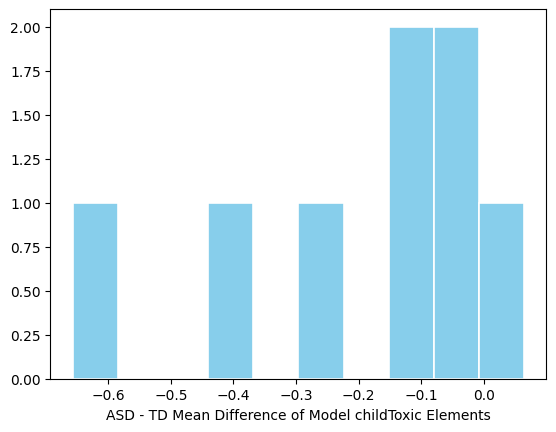

In [328]:
# Make arrays of the mean childToxic model-defined elements
meanchildToxic_asd_0 = np.array([-0.074468, -0.055064, -0.161213, -0.029830, -0.020329, -0.362966, -0.241307, 0.035195])
meanchildToxic_td_1 = np.array([0.060147, 0.044475, 0.130211, 0.024094, 0.016419, 0.293165, 0.194902, -0.028427])

# Combine those arrays into a data frame
meanchildToxic_df = pd.DataFrame({'meanchildToxic_asd_0': meanchildToxic_asd_0,
                              'meanchildToxic_td_1': meanchildToxic_td_1})

# Calculate the differences between each pair and insert a new column
meanchildToxic_df['difference'] = meanchildToxic_df['meanchildToxic_asd_0'] - meanchildToxic_df['meanchildToxic_td_1']

# Inspect the differences to see if they appear to be normally-distributed
plt.hist(meanchildToxic_df['difference'], bins=10, color='skyblue', edgecolor='white', linewidth=1.2)
plt.xlabel("ASD - TD Mean Difference of Model childToxic Elements")
plt.show()

In [329]:
# Create a dataframe of the meanToxicC_asd_0 and meanToxicC_td_1 arrays
meanchildToxic_df = pd.DataFrame({'meanchildToxic_asd_0': meanchildToxic_asd_0, 'meanchildToxic_td_1': meanchildToxic_td_1})

# Calculate the difference between the means of the two DV levels for childToxic
diff_meanchildToxic = meanchildToxic_df['meanchildToxic_asd_0'] - meanchildToxic_df['meanchildToxic_td_1']

# Add the difference as a new column to the existing dataframe
meanchildToxic_df['diff_meanchildToxic'] = diff_meanchildToxic

for i, val in enumerate(meanchildToxic_df['diff_meanchildToxic']):
    print(f"{i}: {val}")

0: -0.134615
1: -0.099539
2: -0.291424
3: -0.053924
4: -0.036748
5: -0.656131
6: -0.43620899999999996
7: 0.063622


In [330]:
childEssential_subset.groupby('Status')[['Boron', 'Copper', 'Molybdenum', 'Phosphorus', 'Sodium', 'Sulfur', 'Vanadium', 'Zinc']].mean()

,Boron,Copper,Molybdenum,Phosphorus,Sodium,Sulfur,Vanadium,Zinc
Status,,,,,,,,
0,0.053981,-0.089032,-0.419236,-0.485736,-0.068585,-0.62967,0.009313,-0.328669
1,-0.043600,0.071911,0.338614,0.392326,0.055395,0.50858,-0.007522,0.265463


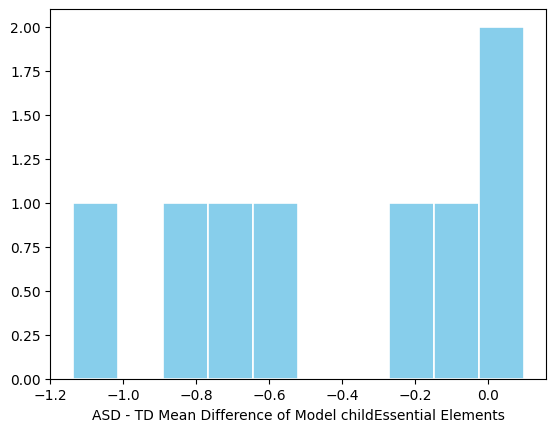

In [331]:
# Make arrays of the mean childEssential model-defined elements
meanchildEssential_asd_0 = np.array([0.053981, -0.089032, -0.419236, -0.485736, -0.068585, -0.62967, 0.009313, -0.328669])
meanchildEssential_td_1 = np.array([-0.043600, 0.071911, 0.338614, 0.392326, 0.055395, 0.50858, -0.007522, 0.265463])

# Combine those arrays into a data frame
meanchildEssential_df = pd.DataFrame({'meanchildEssential_asd_0': meanchildEssential_asd_0,
                              'meanchildEssential_td_1': meanchildEssential_td_1})

# Calculate the differences between each pair and insert a new column
meanchildEssential_df['difference'] = meanchildEssential_df['meanchildEssential_asd_0'] - meanchildEssential_df['meanchildEssential_td_1']

# Inspect the differences to see if they appear to be normally-distributed
plt.hist(meanchildEssential_df['difference'], bins=10, color='skyblue', edgecolor='white', linewidth=1.2)
plt.xlabel("ASD - TD Mean Difference of Model childEssential Elements")
plt.show()

In [332]:
# Create a dataframe of the meanchildEssential_asd_0 and meanchildEssential_td_1 arrays
meanchildEssential_df = pd.DataFrame({'meanchildEssential_asd_0': meanchildEssential_asd_0, 'meanchildEssential_td_1': meanchildEssential_td_1})

# Calculate the difference between the means of the two DV levels for childEssential
diff_meanchildEssential = meanchildEssential_df['meanchildEssential_asd_0'] - meanchildEssential_df['meanchildEssential_td_1']

# Add the difference as a new column to the existing dataframe
meanchildEssential_df['diff_meanchildEssential'] = diff_meanchildEssential

for i, val in enumerate(meanchildEssential_df['diff_meanchildEssential']):
    print(f"{i}: {val}")

0: 0.097581
1: -0.160943
2: -0.75785
3: -0.878062
4: -0.12397999999999999
5: -1.13825
6: 0.016835
7: -0.594132


<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

# Page 10 - Q2: Conclusions<a class="anchor" id="PAN_page10"></a>

[Back to Top](#PAN_top)

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

##### explain the conclusions

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

# Page 11 - Q3: "Is there a predictive relationship between levels of toxic and essential elements and the occurrence of ASD/TD in mothers?"<a class="anchor" id="PAN_page11"></a>

[Back to Top](#PAN_top)

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

## Subgroup Analysis:
The data shows urine test result levels of toxic and non-toxic essential elements for mothers with ASD or TD type, as well as their ASD or TD type children. 
Logistic regression can help evaluate whether there is a significant association between the levels of elements and the occurrence of ASD, while controlling for potential confounding factors.

### Subgroups:

-mother_subset  
-motherToxic_subset (containing Mother ASD + TD only toxic elements)  
-motherEssential_subset (containing Mother ASD + TD only non-toxic essential elements)  

## Creating mother subsets:

In [333]:
## Create mother subset
mother_subset = data.loc[data['Type'] == "'Mother'"]

# View the subset data
mother_subset

,ID,Status,Type,Aluminum,Antimony,Arsenic,Barium,Beryllium,Bismuth,Cadmium,Cesium,Gadolinium,Lead,Mercury,Nickel,Palladium,Platinum,Tellurium,Thallium,Thorium,Tin,Tungsten,Uranium,Boron,Calcium,Chromium,Cobalt,Copper,Iron,Lithium,Magnesium,Manganese,Molybdenum,Phosphorus,Potassium,Selenium,Sodium,Strontium,Sulfur,Vanadium,Zinc,Creatinine
47,1,0,'Mother',1.400000,0.000113,61.000000,1.300000,0.000707,0.000113,0.100000,5.4,0.000099,0.200000,0.300000,3.100000,0.000849,0.000113,0.000566,0.100000,0.000042,0.400000,0.080000,0.000071,2.20,140.0,0.000424,0.001131,0.007,0.250000,0.055,77,0.000700,0.036,680,23,0.059,42,0.120,410,0.000283,0.160,250.0
48,2,0,'Mother',1.800000,0.000057,4.800000,1.500000,0.000354,0.000057,0.090000,3.1,0.000049,0.100000,0.000212,3.100000,0.000424,0.000057,0.000283,0.100000,0.000021,0.070000,0.000035,0.000035,1.60,34.0,0.000212,0.001000,0.011,0.070711,0.180,83,0.000600,0.012,860,15,0.056,110,0.067,590,0.000141,0.160,128.0
49,3,0,'Mother',3.300000,0.000057,2.900000,5.000000,0.000354,0.000057,0.200000,3.4,0.000049,0.200000,0.000212,3.500000,0.000424,0.000057,0.000283,0.060000,0.000021,1.700000,0.200000,0.000035,0.68,160.0,0.000212,0.000566,0.010,0.300000,0.210,91,0.000500,0.035,590,10,0.041,91,0.230,470,0.000141,0.210,106.0
50,5,0,'Mother',2.500000,0.000113,14.000000,0.900000,0.000707,0.000113,0.300000,2.5,0.090000,0.300000,0.000424,1.600000,0.000849,0.000113,0.000566,0.100000,0.000042,0.200000,0.080000,0.000071,0.73,49.0,0.000424,0.001131,0.014,0.141421,0.070,29,0.000800,0.140,600,19,0.080,83,0.081,550,0.000400,0.320,169.0
51,6,0,'Mother',5.200000,0.000113,3.000000,1.200000,0.000707,0.000113,0.400000,3.0,0.000099,0.200000,0.000424,5.100000,0.000849,0.000113,0.000566,0.300000,0.000042,0.500000,0.100000,0.000071,2.00,170.0,0.000424,0.001000,0.010,0.300000,0.035,110,0.000700,0.037,970,20,0.037,58,0.210,420,0.000283,0.400,251.0
52,7,0,'Mother',9.200000,0.000057,12.000000,0.600000,0.000354,0.000057,0.000071,4.2,0.000049,0.000071,0.000212,1.900000,0.000424,0.000057,0.000283,0.200000,0.000021,0.000057,0.000035,0.000035,1.10,53.0,0.000212,0.000566,0.018,0.070711,0.021,67,0.002000,0.035,190,27,0.039,43,0.062,290,0.000141,0.850,44.0
53,8,0,'Mother',0.001414,0.000113,18.000000,0.900000,0.000707,0.000113,0.200000,2.7,0.000099,0.000141,0.000424,1.800000,0.000849,0.000113,0.000566,0.100000,0.000042,0.000113,0.000071,0.000071,0.71,63.0,0.000424,0.001131,0.009,0.130000,0.096,47,0.001000,0.018,590,30,0.042,68,0.074,470,0.000283,0.210,157.0
54,9,0,'Mother',43.000000,0.000057,2.700000,2.200000,0.000354,0.000057,0.090000,2.6,0.000049,0.300000,0.000212,3.400000,0.000424,0.000057,0.000283,0.070000,0.000021,1.100000,0.050000,0.080000,1.30,140.0,0.000212,0.000566,0.008,0.260000,0.047,66,0.000700,0.014,520,14,0.033,66,0.260,820,0.000141,0.410,123.0
55,10,0,'Mother',3.200000,0.400000,3.600000,0.600000,0.000707,0.000113,0.200000,3.9,0.000099,0.100000,0.000424,5.500000,0.000849,0.000113,0.000566,0.100000,0.000042,0.200000,0.000071,0.000071,0.99,87.0,0.000424,0.001131,0.008,0.170000,0.019,45,0.001000,0.027,510,31,0.051,39,0.085,410,0.000283,0.600,249.0
56,11,0,'Mother',5.000000,0.000057,3.400000,6.100000,0.000354,0.000057,0.000071,6.4,0.000049,0.200000,0.000212,6.200000,0.000424,0.000057,0.000283,0.200000,0.000021,0.200000,0.100000,0.000035,4.10,310.0,0.000212,0.000900,0.013,0.580000,0.052,83,0.001000,0.046,610,26,0.047,110,0.320,900,0.000400,0.550,122.0


## Standardize the Data

This helps to eliminate differences in scale between variables, which can cause issues in some types of analysis.  
  
Standardization is useful because many machine learning algorithms and statistical tests assume that the variables have a normal distribution with a mean of 0 and a standard deviation of 1. Standardizing the variables helps to meet this assumption, which can improve the performance of the algorithms and the accuracy of the results.  
  
In addition, standardization makes it easier to compare variables and interpret coefficients in linear models. It also helps to reduce the impact of outliers on the analysis, since outliers can have a large effect on the mean and standard deviation of the variables.

In [343]:
# Select only the continuous columns
continuous_cols2 = mother_subset.select_dtypes(include=['float64', 'int64'])

# Drop the columns that you don't want to standardize
continuous_cols2 = continuous_cols2.drop(['ID', 'Status'], axis=1)

# Standardize the remaining columns
scaler = StandardScaler()
mother_subset_std = scaler.fit_transform(continuous_cols2)

# Create a new DataFrame with the standardized data and the 'ID' and 'Status' columns
mother_subset_std_df = pd.concat([mother_subset[['ID', 'Status']], pd.DataFrame(mother_subset_std, columns=continuous_cols2.columns)], axis=1)

mother_subset_std_df

,ID,Status,Aluminum,Antimony,Arsenic,Barium,Beryllium,Bismuth,Cadmium,Cesium,Gadolinium,Lead,Mercury,Nickel,Palladium,Platinum,Tellurium,Thallium,Thorium,Tin,Tungsten,Uranium,Boron,Calcium,Chromium,Cobalt,Copper,Iron,Lithium,Magnesium,Manganese,Molybdenum,Phosphorus,Potassium,Selenium,Sodium,Strontium,Sulfur,Vanadium,Zinc,Creatinine
47,1.0,0.0,0.531974,-0.153187,-0.741002,-0.972076,1.035098,-0.255653,0.481919,-0.828550,-0.186936,0.195413,-0.504278,0.152850,1.035098,1.035098,1.035098,-0.537797,1.035098,0.755888,1.041280,-0.224143,-0.619857,-0.134411,0.957179,0.381378,-0.410848,-0.055382,-0.732531,0.159986,1.889845,0.806005,0.516097,1.109066,0.045834,0.937118,-0.214525,-0.158934,0.530598,-0.933652,0.943034
48,2.0,0.0,-0.517274,-0.153187,-0.556563,0.603772,1.035098,-0.255653,-0.319123,-0.493432,-0.186936,-0.603349,-0.504278,-0.946755,1.035098,1.035098,1.035098,-0.986594,1.035098,-0.574268,0.067029,-0.224143,-0.939586,-0.642966,0.957179,0.381378,-0.783178,-0.755473,-0.400927,-0.579063,-0.671281,-0.815948,0.033297,-0.749039,-1.143444,-0.851049,-0.502878,-1.080749,0.530598,-1.424521,1.746062
49,3.0,0.0,-0.463922,-0.153187,0.710077,-0.534340,1.035098,-0.255653,0.481919,-0.895573,-0.186936,0.195413,0.552793,-0.603128,1.035098,1.035098,1.035098,0.584197,1.035098,0.090810,1.041280,-0.224143,-0.430388,-0.508348,0.957179,0.381378,-0.224682,-0.580450,0.137930,0.529510,-0.122469,1.238526,-0.594344,0.224254,0.605495,-0.534395,-0.502878,0.117611,0.530598,-1.184664,1.385519
50,5.0,0.0,-0.375003,-0.154261,-0.272888,-0.446793,-0.966092,-0.255679,-0.974006,-0.091291,-0.190124,0.195413,1.258505,-0.259502,-0.966092,-0.966092,-0.966092,1.706190,-0.966092,-0.175221,-0.127821,-0.226152,-0.975111,-0.254071,-0.945919,0.087384,-0.410848,-0.230405,-0.069322,-0.373772,1.889845,-0.635731,-0.014983,2.436283,-0.164038,2.986059,-0.070348,-0.850295,1.884025,-0.264285,-1.208751
51,6.0,0.0,-0.037109,-0.154261,-0.015602,-0.534340,-0.966092,-0.255679,1.210139,0.780015,-0.190124,0.195413,-0.505027,0.290301,-0.966092,-0.966092,-0.966092,0.584197,-0.966092,-0.574268,-0.127821,-0.226152,2.766899,-0.628008,-0.945919,2.325277,-0.038517,-0.755473,0.697513,-1.400229,0.060469,0.481614,1.143738,1.197547,-0.653741,0.378316,-0.502878,-0.896386,-1.103133,0.851327,-0.630244
52,7.0,0.0,-0.321651,-0.153187,-0.741002,-0.271699,1.035098,-0.255653,1.210139,-1.230691,-0.186936,-0.603349,-0.504278,-0.122051,1.035098,1.035098,1.035098,-0.874395,1.035098,-0.308237,0.067029,-0.224143,-0.619857,0.089951,0.957179,-0.583983,-0.410848,0.032129,-0.877608,-0.209539,-0.671281,1.598959,0.998898,-0.749039,-0.653741,-0.590275,-0.502878,-0.435478,0.530598,0.683986,1.631344
53,8.0,0.0,0.158513,-0.153187,-0.398233,-0.009058,1.035098,-0.255653,-0.246301,-1.230691,-0.186936,0.195413,-0.504278,0.771378,1.035098,1.035098,1.035098,-1.098794,1.035098,-0.042206,0.067029,2.612837,-0.761959,1.585700,0.957179,-0.360194,-0.038517,1.257288,-0.110773,1.638084,-0.671281,0.121180,1.433418,-1.191445,0.115792,-0.441261,1.083064,-0.573751,0.728803,1.018669,1.139694
54,9.0,0.0,0.211865,-0.153187,-0.431219,-0.096605,1.035098,-0.255653,0.481919,0.042756,-0.186936,0.195413,-0.504278,0.290301,1.035098,1.035098,1.035098,-0.762196,1.035098,-0.707133,0.067029,-0.224143,-0.548806,0.239526,0.957179,2.325277,-0.038517,0.119641,-0.628905,-0.414830,-0.854219,0.085137,0.564377,-0.837520,-0.513826,-0.292247,-0.502878,-0.158934,0.530598,0.014618,0.615268
55,10.0,0.0,-0.463922,-0.154261,2.029495,-0.096605,-0.966092,-0.255679,-0.974006,1.383227,-0.190124,0.994174,1.258505,-0.328227,-0.966092,-0.966092,-0.966092,0.584197,-0.966092,0.090810,-0.906877,-0.226152,0.043284,-1.076733,-0.945919,-0.884565,6.477271,-1.186810,0.303732,-1.071763,0.060469,-0.203210,0.129857,0.312735,1.864731,0.378316,-0.502878,1.362062,-1.103133,-0.598968,-0.040264
56,11.0,0.0,1.012138,-0.153187,-0.398233,1.304149,1.035098,0.729763,1.938359,0.176803,-0.186936,0.195413,-0.504278,0.290301,1.035098,1.035098,1.035098,-0.874395,1.035098,-0.175221,1.041280,-0.224143,-0.84

,ID,Status,ID,Status,Aluminum,Antimony,Arsenic,Barium,Beryllium,Bismuth,Cadmium,Cesium,Gadolinium,Lead,Mercury,Nickel,Palladium,Platinum,Tellurium,Thallium,Thorium,Tin,Tungsten,Uranium,Boron,Calcium,Chromium,Cobalt,Copper,Iron,Lithium,Magnesium,Manganese,Molybdenum,Phosphorus,Potassium,Selenium,Sodium,Strontium,Sulfur,Vanadium,Zinc,Creatinine
47,1.0,0.0,1.0,0.0,0.531974,-0.153187,-0.741002,-0.972076,1.035098,-0.255653,0.481919,-0.828550,-0.186936,0.195413,-0.504278,0.152850,1.035098,1.035098,1.035098,-0.537797,1.035098,0.755888,1.041280,-0.224143,-0.619857,-0.134411,0.957179,0.381378,-0.410848,-0.055382,-0.732531,0.159986,1.889845,0.806005,0.516097,1.109066,0.045834,0.937118,-0.214525,-0.158934,0.530598,-0.933652,0.943034
48,2.0,0.0,2.0,0.0,-0.517274,-0.153187,-0.556563,0.603772,1.035098,-0.255653,-0.319123,-0.493432,-0.186936,-0.603349,-0.504278,-0.946755,1.035098,1.035098,1.035098,-0.986594,1.035098,-0.574268,0.067029,-0.224143,-0.939586,-0.642966,0.957179,0.381378,-0.783178,-0.755473,-0.400927,-0.579063,-0.671281,-0.815948,0.033297,-0.749039,-1.143444,-0.851049,-0.502878,-1.080749,0.530598,-1.424521,1.746062
49,3.0,0.0,3.0,0.0,-0.463922,-0.153187,0.710077,-0.534340,1.035098,-0.255653,0.481919,-0.895573,-0.186936,0.195413,0.552793,-0.603128,1.035098,1.035098,1.035098,0.584197,1.035098,0.090810,1.041280,-0.224143,-0.430388,-0.508348,0.957179,0.381378,-0.224682,-0.580450,0.137930,0.529510,-0.122469,1.238526,-0.594344,0.224254,0.605495,-0.534395,-0.502878,0.117611,0.530598,-1.184664,1.385519
50,5.0,0.0,5.0,0.0,-0.375003,-0.154261,-0.272888,-0.446793,-0.966092,-0.255679,-0.974006,-0.091291,-0.190124,0.195413,1.258505,-0.259502,-0.966092,-0.966092,-0.966092,1.706190,-0.966092,-0.175221,-0.127821,-0.226152,-0.975111,-0.254071,-0.945919,0.087384,-0.410848,-0.230405,-0.069322,-0.373772,1.889845,-0.635731,-0.014983,2.436283,-0.164038,2.986059,-0.070348,-0.850295,1.884025,-0.264285,-1.208751
51,6.0,0.0,6.0,0.0,-0.037109,-0.154261,-0.015602,-0.534340,-0.966092,-0.255679,1.210139,0.780015,-0.190124,0.195413,-0.505027,0.290301,-0.966092,-0.966092,-0.966092,0.584197,-0.966092,-0.574268,-0.127821,-0.226152,2.766899,-0.628008,-0.945919,2.325277,-0.038517,-0.755473,0.697513,-1.400229,0.060469,0.481614,1.143738,1.197547,-0.653741,0.378316,-0.502878,-0.896386,-1.103133,0.851327,-0.630244
52,7.0,0.0,7.0,0.0,-0.321651,-0.153187,-0.741002,-0.271699,1.035098,-0.255653,1.210139,-1.230691,-0.186936,-0.603349,-0.504278,-0.122051,1.035098,1.035098,1.035098,-0.874395,1.035098,-0.308237,0.067029,-0.224143,-0.619857,0.089951,0.957179,-0.583983,-0.410848,0.032129,-0.877608,-0.209539,-0.671281,1.598959,0.998898,-0.749039,-0.653741,-0.590275,-0.502878,-0.435478,0.530598,0.683986,1.631344
53,8.0,0.0,8.0,0.0,0.158513,-0.153187,-0.398233,-0.009058,1.035098,-0.255653,-0.246301,-1.230691,-0.186936,0.195413,-0.504278,0.771378,1.035098,1.035098,1.035098,-1.098794,1.035098,-0.042206,0.067029,2.612837,-0.761959,1.585700,0.957179,-0.360194,-0.038517,1.257288,-0.110773,1.638084,-0.671281,0.121180,1.433418,-1.191445,0.115792,-0.441261,1.083064,-0.573751,0.728803,1.018669,1.139694
54,9.0,0.0,9.0,0.0,0.211865,-0.153187,-0.431219,-0.096605,1.035098,-0.255653,0.481919,0.042756,-0.186936,0.195413,-0.504278,0.290301,1.035098,1.035098,1.035098,-0.762196,1.035098,-0.707133,0.067029,-0.224143,-0.548806,0.239526,0.957179,2.325277,-0.038517,0.119641,-0.628905,-0.414830,-0.854219,0.085137,0.564377,-0.837520,-0.513826,-0.292247,-0.502878,-0.158934,0.530598,0.014618,0.615268
55,10.0,0.0,10.0,0.0,-0.463922,-0.154261,2.029495,-0.096605,-0.966092,-0.255679,-0.974006,1.383227,-0.190124,0.994174,1.258505,-0.328227,-0.966092,-0.966092,-0.966092,0.584197,-0.966092,0.090810,-0.906877,-0.226152,0.043284,-1.076733,-0.945919,-0.884565,6.477271,-1.186810,0.303732,-1.071763,0.060469,-0.203210,0.129857,0.312735,1.864731,0.378316,-0.502878,1.362062,-1.103133,-0.598968,-0.040264
56,11.0,0.0,11.0,0.0,1.012138,-0.153187,-0.398233,1.304149,1.035098,0.729763,1.938359,0.176803,-0.186936,0.195413,-0.5042

## Subsetting the Toxic Elements in Mothers:

In [338]:
# Create subset- mother with Toxic elements only
motherToxic_subset = mother_subset.iloc[:, 0:23]

# Preview the first 5 rows of the subset data
print(motherToxic_subset.head())

    ID  Status      Type  Aluminum  Antimony  Arsenic  Barium  Beryllium   
47   1       0  'Mother'       1.4  0.000113     61.0     1.3   0.000707  \
48   2       0  'Mother'       1.8  0.000057      4.8     1.5   0.000354   
49   3       0  'Mother'       3.3  0.000057      2.9     5.0   0.000354   
50   5       0  'Mother'       2.5  0.000113     14.0     0.9   0.000707   
51   6       0  'Mother'       5.2  0.000113      3.0     1.2   0.000707   

     Bismuth  Cadmium  Cesium  Gadolinium  Lead   Mercury  Nickel  Palladium   
47  0.000113     0.10     5.4    0.000099   0.2  0.300000     3.1   0.000849  \
48  0.000057     0.09     3.1    0.000049   0.1  0.000212     3.1   0.000424   
49  0.000057     0.20     3.4    0.000049   0.2  0.000212     3.5   0.000424   
50  0.000113     0.30     2.5    0.090000   0.3  0.000424     1.6   0.000849   
51  0.000113     0.40     3.0    0.000099   0.2  0.000424     5.1   0.000849   

    Platinum  Tellurium  Thallium   Thorium   Tin  Tungsten   

## Subsetting the Essential Elements in Mothers:

In [139]:
# Create subset- mother with Essential elements only
motherEssential_subset = mother_subset.iloc[:, 0:42]

# Drop 'ID' and 'Type'
motherEssential_subset = motherEssential_subset.drop(columns=['ID', 'Type'])

# Drop toxic elements
motherEssential_subset = motherEssential_subset.drop(columns=['Aluminum', 'Antimony', 'Arsenic', 'Barium',
       'Beryllium', 'Bismuth', 'Cadmium', 'Cesium', 'Gadolinium', 'Lead',
       'Mercury', 'Nickel', 'Palladium', 'Platinum', 'Tellurium', 'Thallium',
       'Thorium', 'Tin', 'Tungsten', 'Uranium'])

# View the subset data
motherEssential_subset

,Status,Boron,Calcium,Chromium,Cobalt,Copper,Iron,Lithium,Magnesium,Manganese,Molybdenum,Phosphorus,Potassium,Selenium,Sodium,Strontium,Sulfur,Vanadium,Zinc,Creatinine
47,0,2.20,140.0,0.000424,0.001131,0.007,0.250000,0.055,77,0.000700,0.036,680,23,0.059,42,0.120,410,0.000283,0.160,250.0
48,0,1.60,34.0,0.000212,0.001000,0.011,0.070711,0.180,83,0.000600,0.012,860,15,0.056,110,0.067,590,0.000141,0.160,128.0
49,0,0.68,160.0,0.000212,0.000566,0.010,0.300000,0.210,91,0.000500,0.035,590,10,0.041,91,0.230,470,0.000141,0.210,106.0
50,0,0.73,49.0,0.000424,0.001131,0.014,0.141421,0.070,29,0.000800,0.140,600,19,0.080,83,0.081,550,0.000400,0.320,169.0
51,0,2.00,170.0,0.000424,0.001000,0.010,0.300000,0.035,110,0.000700,0.037,970,20,0.037,58,0.210,420,0.000283,0.400,251.0
52,0,1.10,53.0,0.000212,0.000566,0.018,0.070711,0.021,67,0.002000,0.035,190,27,0.039,43,0.062,290,0.000141,0.850,44.0
53,0,0.71,63.0,0.000424,0.001131,0.009,0.130000,0.096,47,0.001000,0.018,590,30,0.042,68,0.074,470,0.000283,0.210,157.0
54,0,1.30,140.0,0.000212,0.000566,0.008,0.260000,0.047,66,0.000700,0.014,520,14,0.033,66,0.260,820,0.000141,0.410,123.0
55,0,0.99,87.0,0.000424,0.001131,0.008,0.170000,0.019,45,0.001000,0.027,510,31,0.051,39,0.085,410,0.000283,0.600,249.0
56,0,4.10,310.0,0.000212,0.000900,0.013,0.580000,0.052,83,0.001000,0.046,610,26,0.047,110,0.320,900,0.000400,0.550,122.0


<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

# Page 16 - Q3: Analysis: Logistic Regressions<a class="anchor" id="PAN_page16"></a>

[Back to Top](#PAN_top)

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

## Logistic Regression of motherToxic_subset Data:

In [140]:
# Split the data into predictors (X) and response variable (y)
X = motherToxic_subset.drop('Status', axis=1)
y = motherToxic_subset['Status']

# Create a logistic regression object
logreg = LogisticRegression(max_iter=1000)

# Fit the model using the training data
logreg.fit(X, y)

# Print the coefficients of the model
print(logreg.coef_)

[[-3.76960373e-02 -1.94241590e-01  1.05403077e-02 -2.28052522e-01
   5.34388969e-04  1.59088725e-01 -3.25593339e-01 -3.51127111e-01
  -1.00558749e-01  2.56549843e-01 -4.65238193e-01 -9.47578923e-02
   6.41266763e-04  8.55022351e-05  4.27511175e-04 -3.26857166e-01
   3.20633382e-05  6.70001737e-02  6.26339261e-01 -4.92118442e-02]]


Interpretation shows that an increase in the elements 'Arsenic', 'Beryllium', 'Bismuth', 'Lead', 'Palladium', 'Platinum', 'Tellurium', 'Thorium', 'Tin', and 'Tungsten' increases the log-odds of mothers having ASD.

## Logistic Regression of motherEssential_subset Data:

In [141]:
# Split the data into predictors (X) and response variable (y)
X = motherEssential_subset.drop('Status', axis=1)
y = motherEssential_subset['Status']

# Create a logistic regression object
logreg = LogisticRegression(max_iter=1000)

# Fit the model using the training data
logreg.fit(X, y)

# Print the coefficients of the model
print(logreg.coef_)

[[-2.06796076e-01 -3.63403334e-03  4.70736354e-04  2.52344554e-03
  -3.10918368e-03 -4.74018631e-05  1.65686775e-01 -1.27679707e-02
  -1.33561250e-03  2.07334165e-01  3.30430997e-03 -1.55932358e-02
   3.19469008e-02 -6.43872521e-04  3.09208851e-02 -1.32826171e-03
   1.90192174e-04  6.93350849e-02 -3.06317505e-03]]


The coefficients suggest that higher levels of 'Lithium' and 'Molybdenum' essential elements are associated with higher odds of being in the TD group.

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

# Page 21 - Q3: Conclusions<a class="anchor" id="PAN_page21"></a>

[Back to Top](#PAN_top)

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

# Page 22 - Q4: "How does the urine test differ (Toxic vs Essential) for mothers with ASD to TD mothers?"<a class="anchor" id="PAN_page22"></a>

[Back to Top](#PAN_top)

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

# Page 23 - Q4: Conclusions<a class="anchor" id="PAN_page23"></a>

[Back to Top](#PAN_top)

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

# Page 24 - Q5: "How does the urine test differ (Toxic vs Essential) for kids with ASD to their ASD mothers?<a class="anchor" id="PAN_page24"></a>

[Back to Top](#PAN_top)

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

# Page 25 - Q5: Conclusions<a class="anchor" id="PAN_page25"></a>

[Back to Top](#PAN_top)

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

# Page 26 - Q6: "How does the urine test differ (Toxic vs Essential) TD children to their TD mothers?<a class="anchor" id="PAN_page26"></a>

[Back to Top](#PAN_top)

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">

# Page 27 - Q6: Conclusions<a class="anchor" id="PAN_page27"></a>

[Back to Top](#PAN_top)

<hr style="height:5px;border-width:0;color:#D4AF37;background-color:#D4AF37">